In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [2]:
df = pd.read_csv('training_prepped_v1.csv', index_col=0)
df.shape

(809, 132)

In [3]:
df.head(5)

,LotameID,y,operatingSystem,operatingSystemVersion,isMobile,mobileInputSelector,screenResolution,continent,subContinent,onPageTime,...,sub_sec_news,sub_sec_others,sub_sec_politics,sub_sec_region,sub_sec_seismik,sub_sec_sunday-vibes,sub_sec_tennis,sub_sec_world,base_url_https://says.com/,base_url_https://www.nst.com.my/
0,cbb561a1af5a40eb684d55a8c0b2047a,0,False,8,True,True,4,False,True,0,...,0,0,0,0,0,0,0,0,0,0
1,cbb561a1af5a40eb684d55a8c0b2047a,0,False,8,True,True,4,False,True,91472,...,0,0,0,0,0,0,0,0,0,0
2,cbb561a1af5a40eb684d55a8c0b2047a,0,False,8,True,True,4,False,True,103015,...,0,0,0,0,0,0,0,0,0,0
3,e74bb87a1abb30abf105f2900a65e842,1,True,3,False,False,20,False,True,0,...,0,0,0,0,0,0,0,0,0,0
4,e74bb87a1abb30abf105f2900a65e842,1,True,3,False,False,20,False,True,126729,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.iloc[:,2:]
y = df['y']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('Training size:', X_train.shape)
print('Testing size:', X_test.shape)

Training size: (566, 130)
Testing size: (243, 130)


In [6]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
y_pred = rf.predict(X_test)

In [8]:
# metrics

print('R2-score:\t',metrics.r2_score(y_test, y_pred))
print('MAE:\t\t',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:\t\t',metrics.mean_squared_error(y_test, y_pred))

R2-score:	 0.8360473776223776
MAE:		 0.08251028806584361
MSE:		 0.1286432098765432


In [9]:
feat = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

[Text(0, 0, '0.642616'),
 Text(0, 0, '0.129417'),
 Text(0, 0, '0.0522232'),
 Text(0, 0, '0.0230017'),
 Text(0, 0, '0.0104568'),
 Text(0, 0, '0.00991714'),
 Text(0, 0, '0.00891203'),
 Text(0, 0, '0.00890424'),
 Text(0, 0, '0.00871381'),
 Text(0, 0, '0.00780665'),
 Text(0, 0, '0.00720177'),
 Text(0, 0, '0.00692365'),
 Text(0, 0, '0.00692215'),
 Text(0, 0, '0.00655498'),
 Text(0, 0, '0.00584307'),
 Text(0, 0, '0.0056183'),
 Text(0, 0, '0.00536056'),
 Text(0, 0, '0.00437347'),
 Text(0, 0, '0.00424764'),
 Text(0, 0, '0.00370925')]

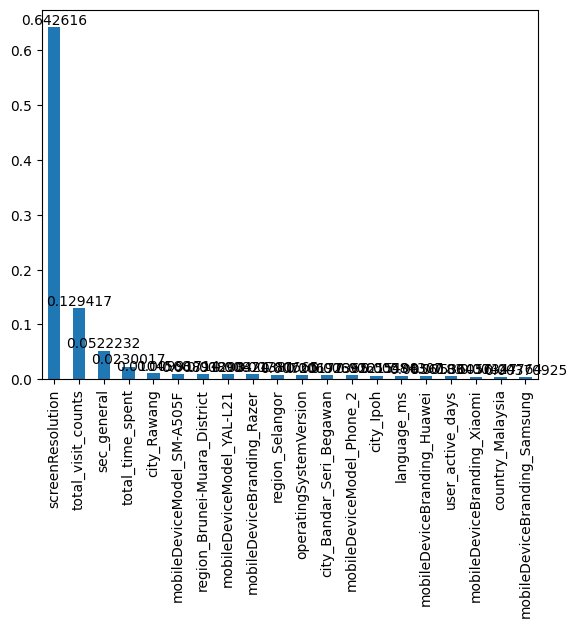

In [10]:
ax = feat.head(20).plot(kind='bar')

ax.bar_label(''.format(ax.containers[0]))

# Future work

- Try out different models (will require feature scaling during preprocess)
- Perform hyperparameter tuning using Bayesian optimization
- Experiment with different features